## 3. Análise Exploratória dos Dados (EDA) 
📒 `2.1-rc-eda-cleaned.ipynb`

**Objetivo:** Explorar os dados tratados por meio de estatísticas descritivas e visualizações gráficas para identificar padrões, tendências e possíveis relações entre variáveis.

📊 **Atividades:**

- Testar as seguintes hipotéses relacionados ao negócio:
- a) Características relacionadas à ***performance do veículo*** (ex: `horsepower`, `engine-size`) terão uma correlação positiva significativa com o `price`?
- b) ***Veículos com design maior tamanho*** (`length`, `width`, `wheel-base`) tenderão a ter um `price` mais alto?
- c) Certas marcas (`make`) terão um impacto significativo no` price`, refletindo percepção de valor e posicionamento de mercado.
- d) Tipos de carroceria (`body-style`) associados a segmentos premium ou esportivos (ex: convertible, hardtop) terão preços médios `price` mais altos do que tipos de carroceria mais utilitários (ex: sedan, hatchback).
- e) O risco atribuído pelo seguro (`symboling`) terá alguma correlação com o `price`.
- f)  As perdas normalizadas (`normalized-losses`) terão uma correlação com o `price`.
- Insights Relevantes
- Next Steps




In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
import sys
#from _utils import classificar_correlacao
from scipy.stats import normaltest, pearsonr,kruskal


sys.path.append("../src")  # adiciona o caminho da pasta src

# Setup para mostrar todas as colunas do dataframe
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Desabilita mensagens de FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [68]:
# Carrega dados
file_path = "../data/processed/car_price_prep.csv"
df = pd.read_csv(file_path)

df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,price,price-binned,risk_insurance,car-profile,avg-mpg,power-to-weight-ratio
0,3,115,alfa-romero,gas,std,two,convertible,rwd,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,13495,medium,high,sport/premium,24.0,43.563579
1,3,115,alfa-romero,gas,std,two,convertible,rwd,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,16500,medium,high,sport/premium,24.0,43.563579
2,1,115,alfa-romero,gas,std,two,hatchback,rwd,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,16500,medium,moderate,utility,22.5,54.551895
3,2,164,audi,gas,std,four,sedan,fwd,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,13950,medium,high,utility,27.0,43.645700
4,2,164,audi,gas,std,four,sedan,4wd,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,17450,medium,high,utility,20.0,40.722380


#### Verificando a Distribuição dos Dados 
**Objetivo:** Verificar a distribuição da variável alvo ´price´

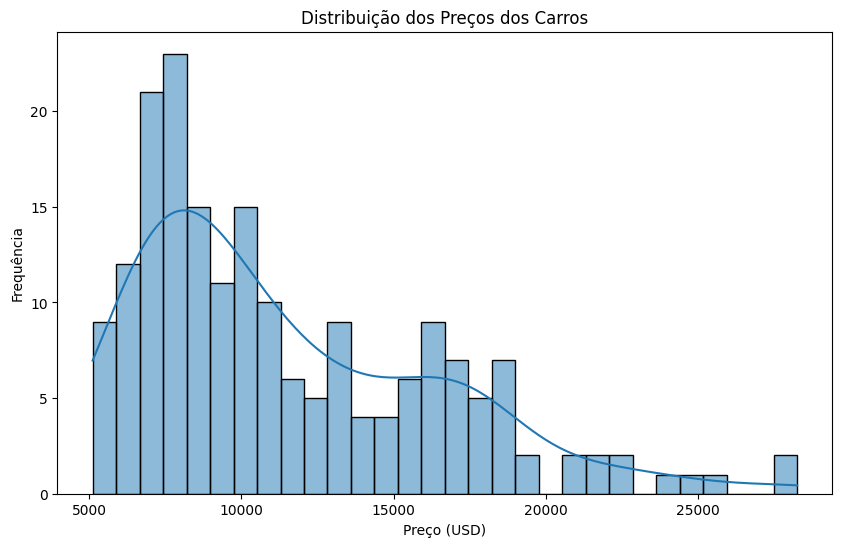

Moda: 10295
Mediana: 9988.0
Media: 11477.874345549739
Distribuição Assimetrica á Direita: moda < media < mediana 


In [69]:
# Análise da distribuição da variável target (price)
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribuição dos Preços dos Carros')
plt.xlabel('Preço (USD)')
plt.ylabel('Frequência')
plt.show()

print("Moda:", df['price'].mode()[0])
print("Mediana:", df['price'].median())
print("Media:", df['price'].mean())
print("Distribuição Assimetrica á Direita: moda < media < mediana ")

### Variáveis Numéricas

**📌Insights esperados**:
- a) Características relacionadas à ***performance do veículo*** (ex: `horsepower`, `engine-size`) terão uma correlação positiva significativa com o `price`?
- b) ***Veículos com design de maior tamanho*** (`length`, `width`, `wheel-base`) tenderão a ter um `price` mais alto?
- f)  As perdas normalizadas (`normalized-losses`) terão uma correlação com o `price`.


**1° passo)** Selecionar as variáveis númericas

In [71]:
# Seleciona as variáveis numéricas

df['symboling'] = df['symboling'].astype('object')

features_numeric = df.select_dtypes(include=['int64', 'float64']).columns.to_list()
print(features_numeric)

['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'price', 'avg-mpg', 'power-to-weight-ratio']


**2° passo)** Avaliar a Estatistica Descritiva dos dados númericos

In [72]:
# Estatistica Descritiva
df.describe()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,price,avg-mpg,power-to-weight-ratio
count,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000
mean,120.827225,98.276963,172.826702,65.670157,53.738220,2484.670157,118.858639,3.306492,3.251257,10.182827,98.282723,5128.795812,11477.874346,28.701571,39.083058
std,32.782320,5.267057,11.347755,1.902242,2.430693,449.312412,27.473929,0.264992,0.303469,4.005299,33.147099,472.572039,4929.765412,6.299745,8.386389
min,65.000000,86.600000,141.100000,60.300000,48.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,5118.000000,18.500000,19.935691
25%,96.500000,94.500000,166.300000,64.000000,52.000000,2128.000000,97.000000,3.130000,3.115000,8.700000,70.000000,4800.000000,7713.500000,23.500000,34.139472
50%,115.000000,96.500000,172.600000,65.400000,54.100000,2395.000000,110.000000,3.270000,3.290000,9.000000,94.000000,5200.000000,9988.000000,28.000000,37.442922
75%,141.000000,100.400000,178.300000,66.500000,55.500000,2828.500000,136.000000,3.540000,3.410000,9.400000,114.000000,5500.000000,14954.500000,33.750000,43.587285
max,256.000000,114.200000,198.900000,72.300000,59.800000,3750.000000,203.000000,3.940000,3.900000,23.000000,288.000000,6600.000000,28248.000000,51.500000,85.561497


**3° passo)**  Gerar um Heatmap

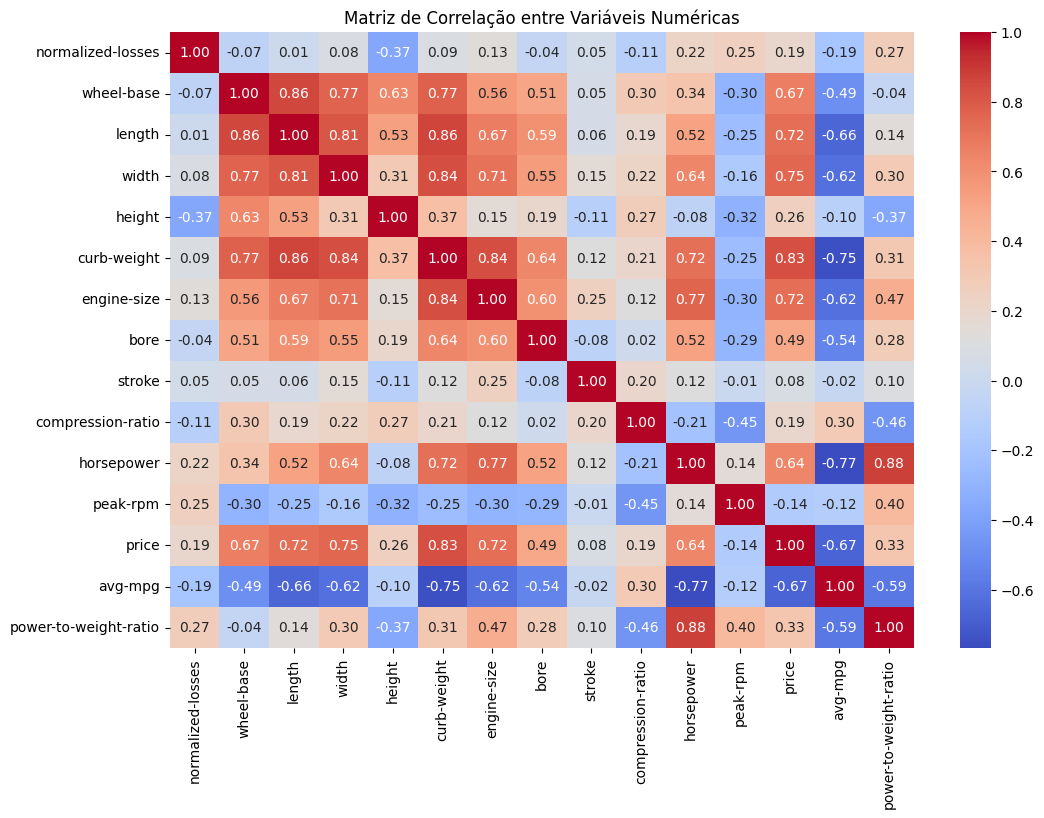

In [73]:
# Matriz de correlação
plt.figure(figsize=(12, 8))
sns.heatmap(df[features_numeric].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação entre Variáveis Numéricas')
plt.savefig('../reports/figures/eda_heatmap_correlation')


5° passo) Selecionar as variáveis preditoras que ***possuem correlação forte ou muito forte*** com o alvo `price`.

Critérios:
- i) **p-value(p):** verifica se existe ou não correlação dentro de um intervalo de confiança de 95%
    - P-value >= 0.05    Ho = ***Falha em rejeitar H₀ - não há correlação significativa***
    - P-value <  0.05    Ha = ***Rejeita H₀ - há diferença ou correlação significativa***
- ii) **pearson_correlation(r):** medir a força da correlação, sendo que (+) a correlação é positiva, (-) a correlação é negativa.

Interpretação Pearson Correlation:

| Valor de r (+ ou -) | Interpretação           |
|---------------------|-------------------------|
| 0.00 a 0.19         | correlação muito fraca  |
| 0.20 a 0.39         | correlação fraca        |
| 0.40 a 0.69         | correlação moderada     |
| 0.70 a 0.89         | correlação forte        |
| 0.90 a 1.00         | correlação muito forte  |

**NOTA:** Considerar o nível de confiança alpha=0.05 (para um intervalo de 95% de confiança)

Fonte: SHIMAKURA, Silvia Emiko. Interpretação do coeficiente de correlação. LEG, UFPR,. 2006.

In [74]:
# Seleciona as variáveis preditoras com forte correlação r >= 0.70
numeric_feature_corr_list = ['curb-weight','length','width', 'wheel-base', 'engine-size','avg-mpg','horsepower', 'price'] 

df_corr = df[numeric_feature_corr_list]

# NOTA: # `avg-mpg` e `horsepower`, `wheel-base` foram classificados como correlação  moderada, próximo de 0.7. 
# Entretanto foi incluido na avaliação para responder as hipóteses levantadas, com isto, consideramos com ~0.7 (forte).

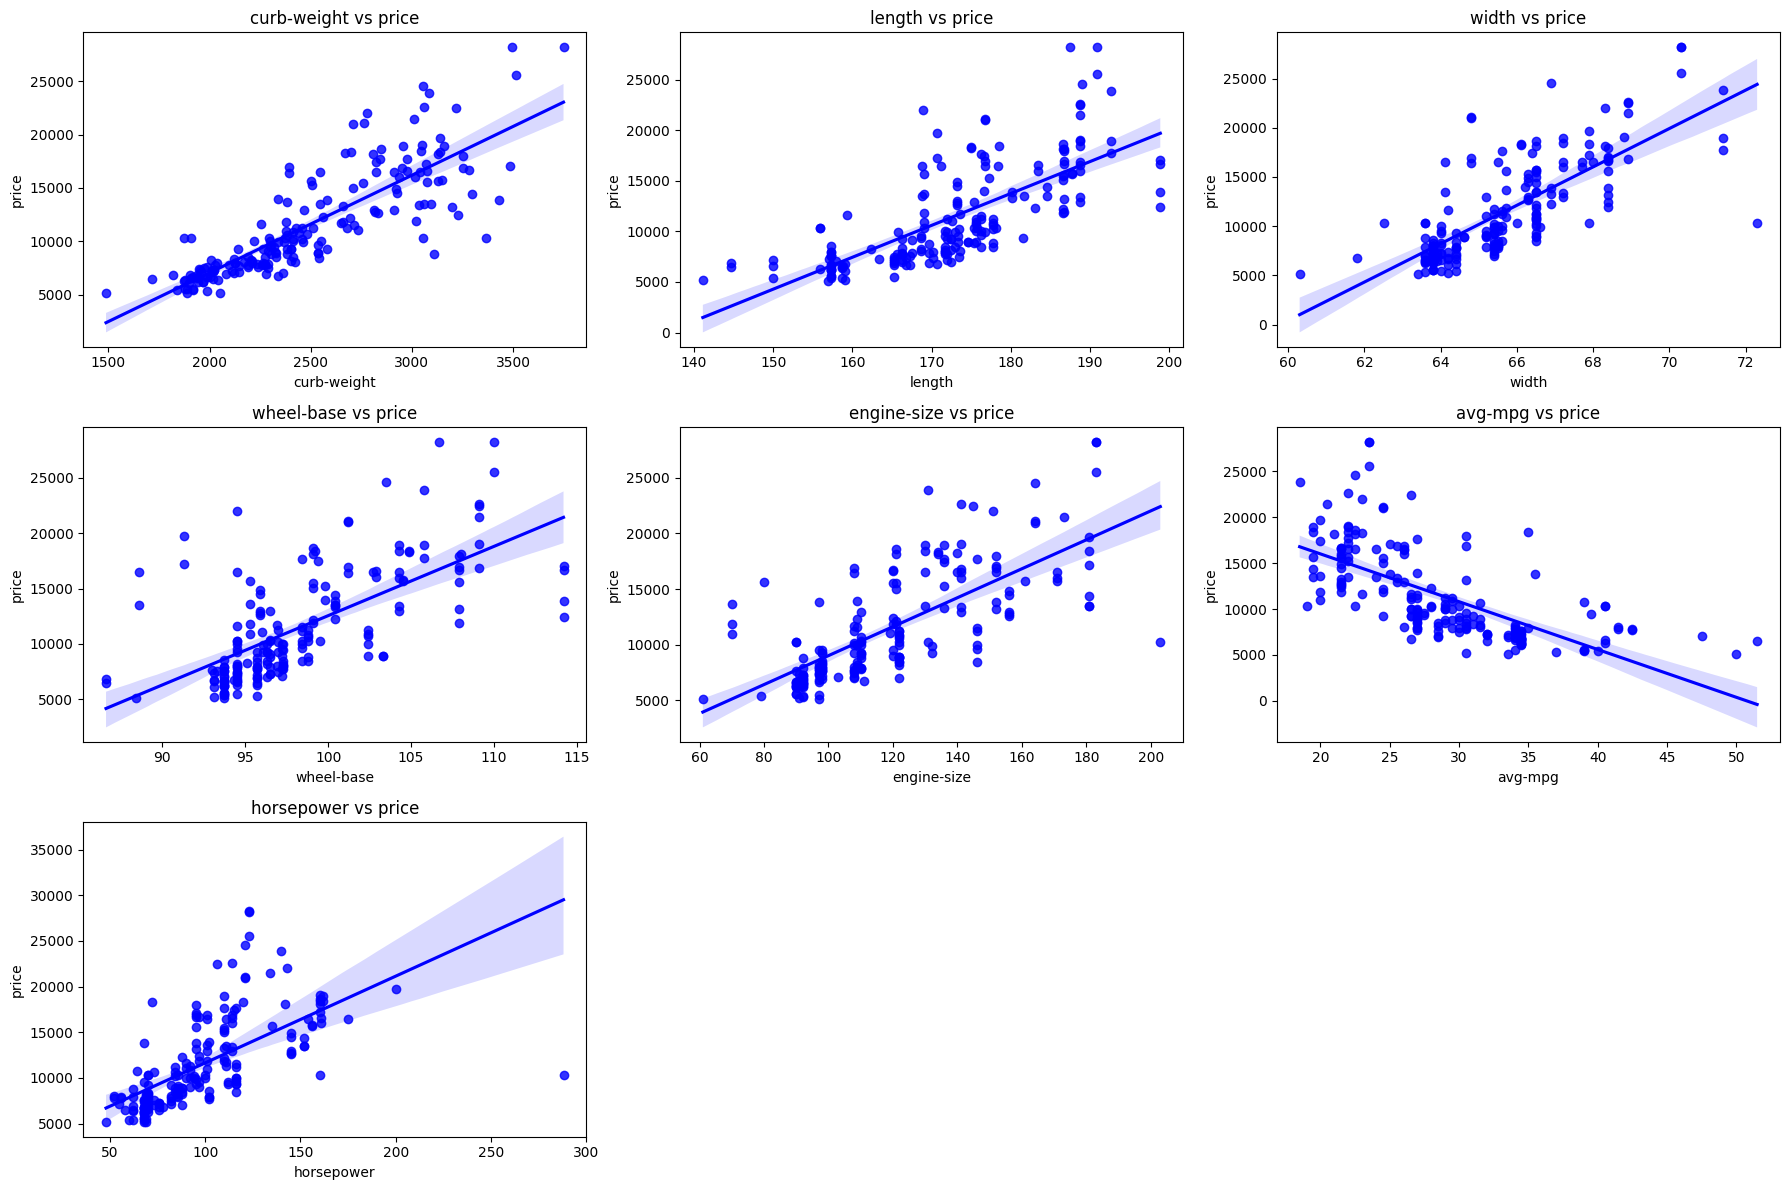

In [75]:
# Criando uma matriz de gráficos de regressão (scatter com linha de regressão)
num_cols = 3
num_rows = int(np.ceil(len(numeric_feature_corr_list[:-1]) / num_cols))  # Exclui 'price' como y

fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 12))

for i, feature in enumerate(numeric_feature_corr_list[:-1]):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    sns.regplot(x=feature, y='price', data=df_corr, color='blue', ax=ax)
    ax.set_title(f'{feature} vs price')

# Esconde eixos vazios, se houver
for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axes[j // num_cols, j % num_cols])

plt.tight_layout()
fig.savefig('../reports/figures/eda_scatterplot_correlation')

**💡Insights Obtidos**:
- Das 13 variáveis numéricas analisadas, 7 apresentaram coeficiente de correlação de Pearson com |r| ≥ 0.70, sendo classificadas como ***correlação forte ou muito forte*** com a variável alvo `price`.
- a) Características relacionadas à ***performance do veículo***, como: `horsepower` e `engine-size` apresentaram uma ***correlação forte positiva significativa com o `price`.*** Ou seja, ***quanto maior a performance do veículo, maiores são os preços***.

- b) ***Veículos com preferência de design de tamanho maior*** (`length`, `width`, `wheel-base`) tendem a ter um preço mais alto, resultando em uma correlação positiva significante
- f)  As perdas normalizadas (`normalized-losses`) não apresentou uma correlação significativa com o `price`, resultando em uma correlação muito fraca.

- A variável `avg-mpg` apresentou ***correlação negativa com o preço***, sugerindo que ***veículos mais caros tendem a ser menos econômicos*** , o que pode refletir em um perfil de mercado com interesse maior em carros mais potentes e maiores. Este padrão reforça que o mercado valoriza veículos com estrutura maior e motores mais robustos, ainda que isso implique menor economia de combustível.


### Variáveis Categóricas

**📌Insights esperados**:
- c) Certas marcas (`make`) terão um impacto significativo no` price`, refletindo percepção de valor e posicionamento de mercado?
- d) Tipos de carroceria (`body-style`) associados a segmentos premium ou esportivos (ex: convertible, hardtop) terão preços médios `price` mais altos do que tipos de carroceria mais utilitários (ex: sedan, hatchback).
- e) O risco atribuído pelo seguro (`symboling`) terá alguma correlação com o `price`.

In [76]:
# Seleciona as variáveis categóricas ´object´ em lista
categorical_features_list = df.select_dtypes(include=['object']).columns.to_list()
categorical_features_list

['symboling',
 'make',
 'fuel-type',
 'aspiration',
 'num-of-doors',
 'body-style',
 'drive-wheels',
 'engine-type',
 'num-of-cylinders',
 'fuel-system',
 'price-binned',
 'risk_insurance',
 'car-profile']

In [77]:
print("Resumo Estatístico - Variáveis Categóricas:")
df.describe(include=['object'])

Resumo Estatístico - Variáveis Categóricas:


,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-type,num-of-cylinders,fuel-system,price-binned,risk_insurance,car-profile
count,191,191,191,191,191,191,191,191,191,191,191,191,191
unique,6,21,2,2,2,5,3,7,6,8,3,4,2
top,0,toyota,gas,std,four,sedan,fwd,ohc,four,mpfi,low,moderate,utility
freq,60,32,172,155,109,87,120,144,159,81,127,73,182


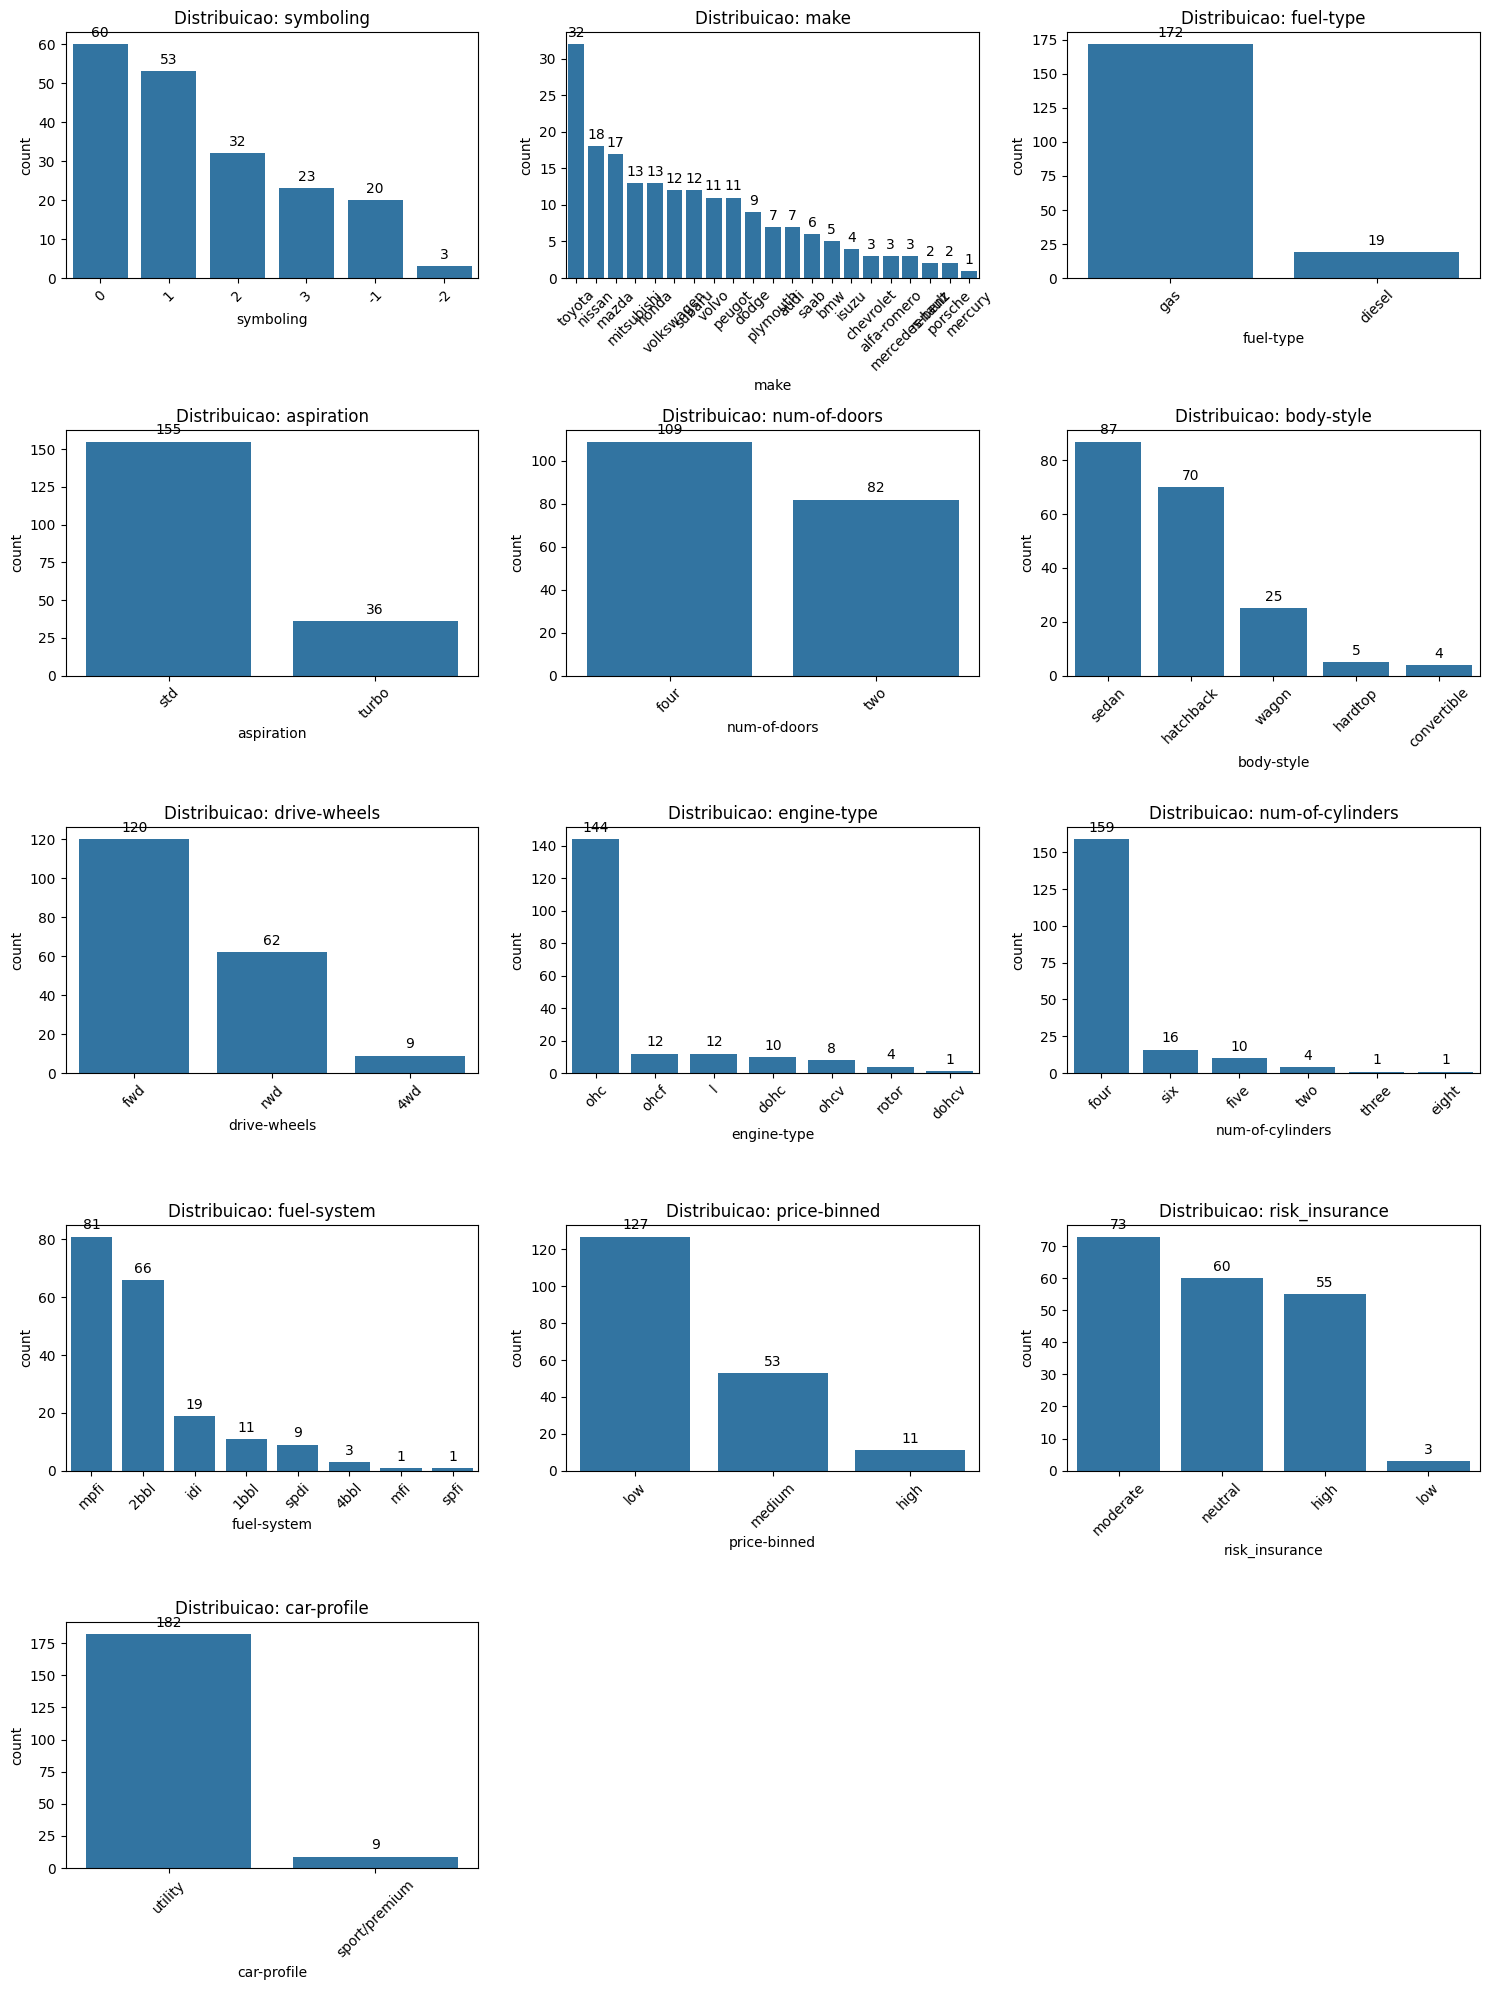

In [78]:
# Distribuição de frequência Absoluta

n = len(categorical_features_list)
cols = 3
rows = (n + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(cols*5, rows*4))
axes = axes.flatten()

for i, col in enumerate(categorical_features_list):
    counts = df[col].value_counts()
    ax=axes[i]
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, ax=axes[i] )
    axes[i].set_title(f'Distribuicao: {col}')
    axes[i].tick_params(axis='x', rotation=45)

        # Adiciona labels nas barras
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 3), textcoords='offset points')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
fig.savefig('../reports/figures/eda_hist_categorical')

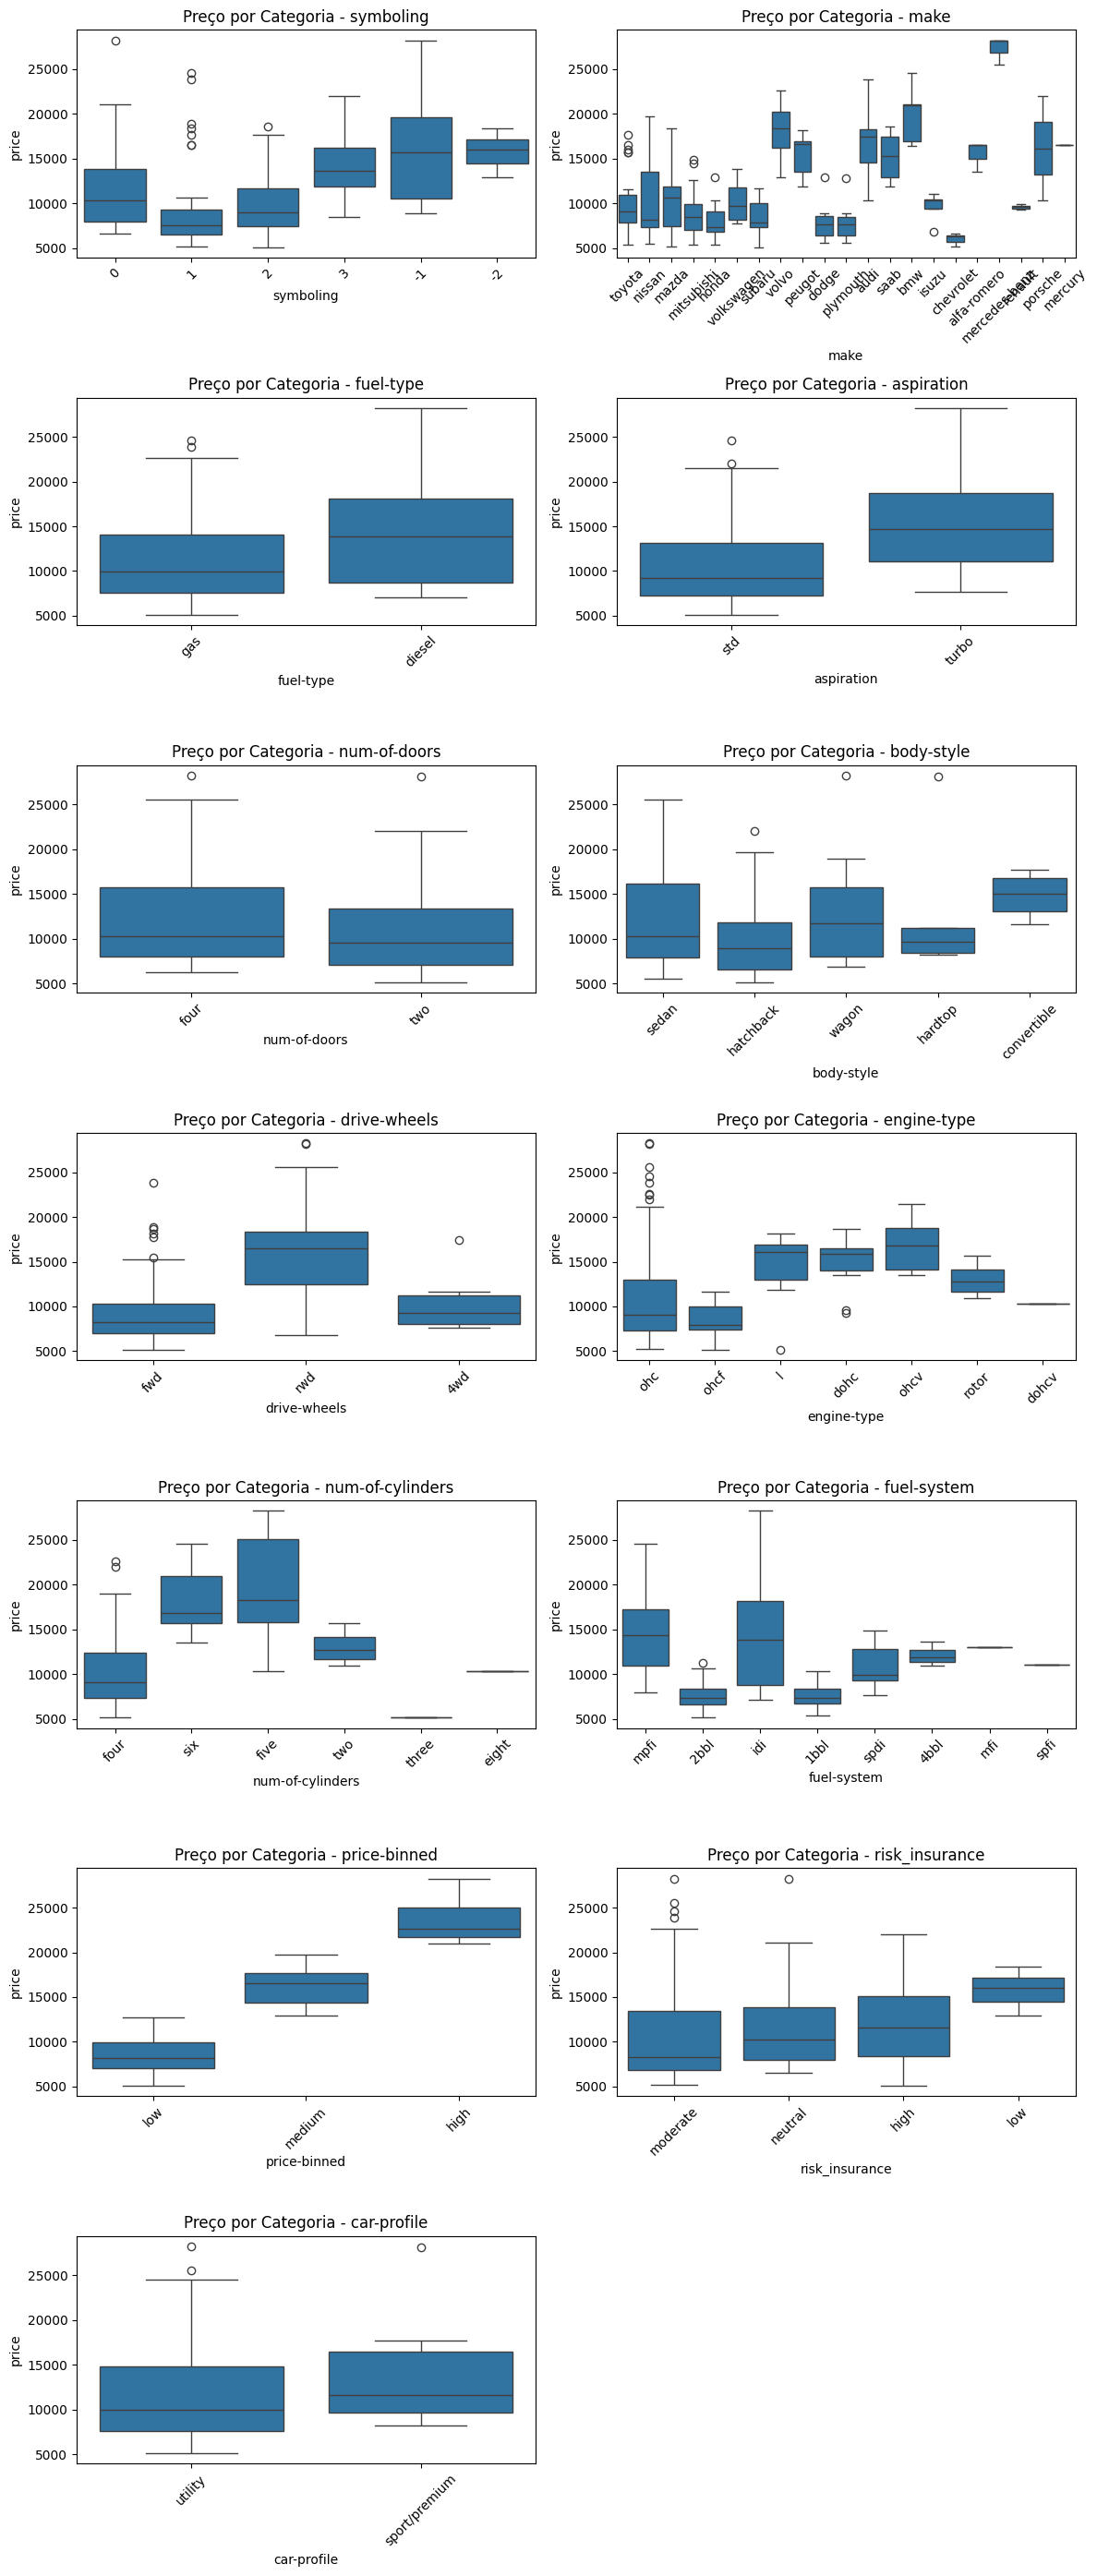

In [79]:
# Distribuição dos Preços por Categoria - Boxplot
if 'price' in df.columns:
    n = len(categorical_features_list)
    cols = 2
    rows = (n + cols - 1) // cols

    fig, axes = plt.subplots(rows, cols, figsize=(cols*6, rows*4))
    axes = axes.flatten()

    for i, col in enumerate(categorical_features_list):
        sns.boxplot(data=df, x=col, y='price', order=df[col].value_counts().index, ax=axes[i])
        axes[i].set_title(f'Preço por Categoria - {col}')
        axes[i].tick_params(axis='x', rotation=45)

    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    fig.savefig('../reports/figures/eda_boxplot_categorical')


##### Agrupando por Fabricante

**📌Insights esperados**:
- c) Certas marcas (`make`) terão um impacto significativo no` price`, refletindo percepção de valor e posicionamento de mercado?



**1º passo)** Análise Descritiva por Marca

Frequência, soma, média, min, max e desvio padrão dos preços por marca. Isso nos permitiria ver como a distribuição de preços varia entre as diferentes marcas.


In [80]:
# Subset
df_group_by_make = df[['make','price']]

# Agrupar por 'make' com estatísticas
df_group_by_make = df_group_by_make.groupby(['make'], as_index=False)['price'].agg(
    count='count', sum='sum', mean='mean',min='min', max='max', std='std' ).round(2)


# Calcular % de participação
total_price = df_group_by_make['sum'].sum()
df_group_by_make['percent%'] = ((df_group_by_make['sum'] / total_price) * 100).round(2)


# Ordenar pela soma total
df_group_by_make = df_group_by_make.sort_values(['count'], ascending=False).reset_index(drop=True)


# Calcular percent acumulado
df_group_by_make['cumsum_%'] = df_group_by_make['percent%'].cumsum().round(2)

# Ajustar índice para iniciar em 1 (opcional)
df_group_by_make.index = range(1, len(df_group_by_make) + 1)


df_group_by_make 


,make,count,sum,mean,min,max,std,percent%,cumsum_%
1,toyota,32,316346,9885.81,5348,17669,3204.98,14.43,14.43
2,nissan,18,187482,10415.67,5499,19699,4477.39,8.55,22.98
3,mazda,17,181099,10652.88,5195,18344,3975.68,8.26,31.24
4,mitsubishi,13,120117,9239.77,5389,14869,3043.00,5.48,36.72
5,honda,13,106401,8184.69,5399,12945,2061.67,4.85,41.57
6,volkswagen,12,120930,10077.50,7775,13845,2178.55,5.52,47.09
7,subaru,12,102495,8541.25,5118,11694,1940.19,4.68,51.77
8,volvo,11,198695,18063.18,12940,22625,3314.65,9.06,60.83
9,peugot,11,170380,15489.09,11900,18150,2246.75,7.77,68.60
10,dodge,9,70879,7875.44,5572,12964,2213.39,3.23,71.83


**2° Passo)** Visualização da Relação Fabricante vs Preço

C:\Users\reyna\AppData\Local\Temp\ipykernel_5252\2822441052.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)


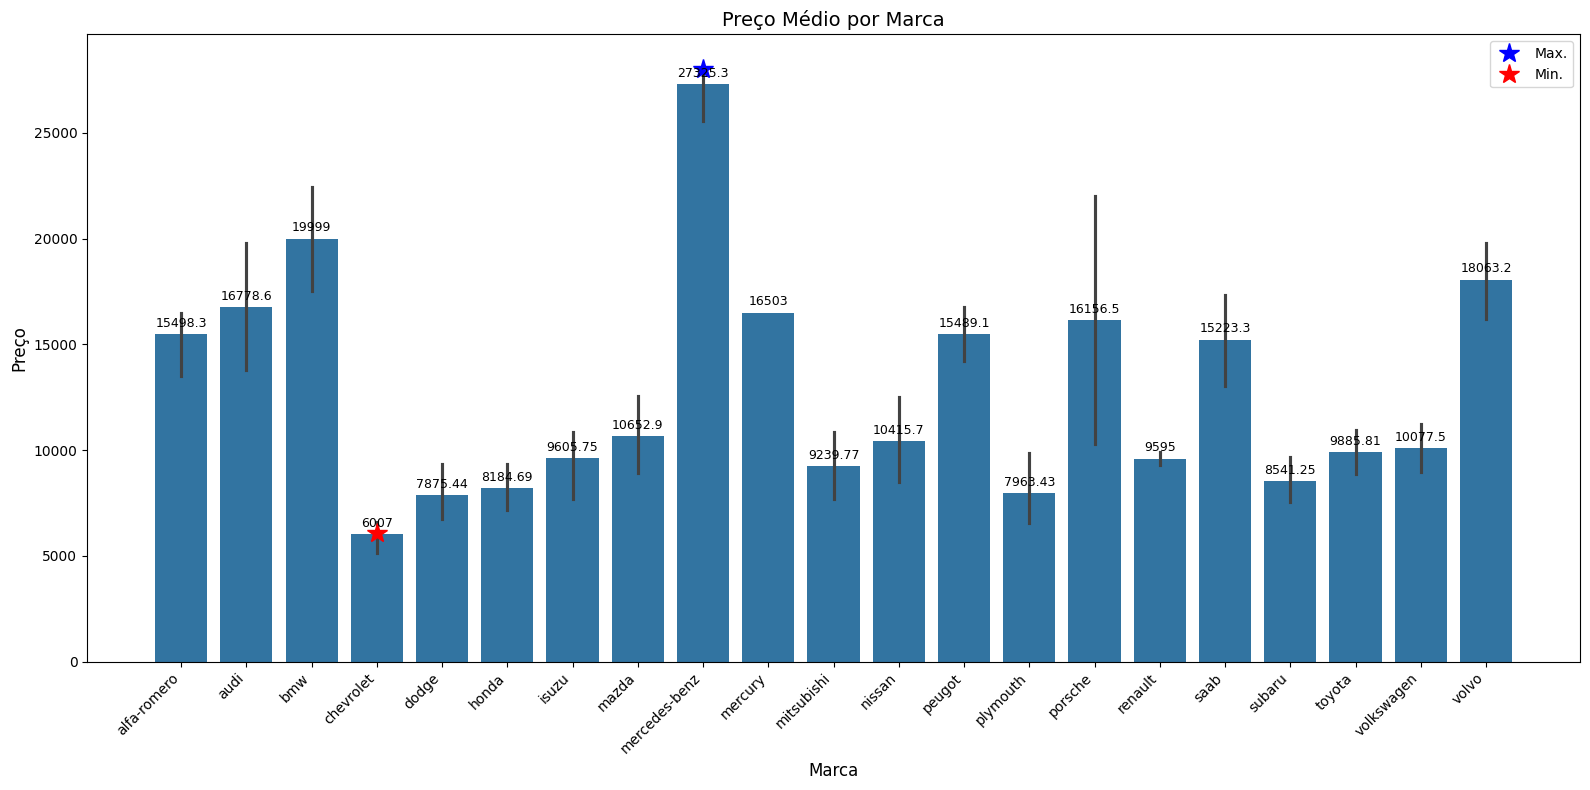

In [81]:
# Gráfico de Barras

# Preço Médio por Fabricante
fig, ax = plt.subplots(figsize=(16, 8)) 

sns.barplot(data=df, x='make', y='price', estimator='mean', ax=ax, errorbar='ci')
ax.bar_label(ax.containers[0], fontsize=9, padding=3)
ax.plot('mercedes-benz', 28000, "*", markersize=10, color="r")

# Ajuste para melhorar a leitura dos rótulos no eixo X
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)

# Títulos
ax.set_title('Preço Médio por Marca', fontsize=14)
ax.set_xlabel('Marca', fontsize=12)
ax.set_ylabel('Preço', fontsize=12)

# Destaca um ponto específico no gráfico
ax.plot(
    df['make'].unique().tolist().index('mercedes-benz'), 28000,
    "*", markersize=15, color="blue", label='Max.'
)

ax.plot(
    df['make'].unique().tolist().index('chevrolet'), 6100,
    "*", markersize=15, color="red", label='Min.'
)

ax.legend()
plt.tight_layout()
plt.savefig('../reports/figures/eda_barplot_price_per_make')


Text(0.5, 1.0, 'Distribuição de preços por marca')

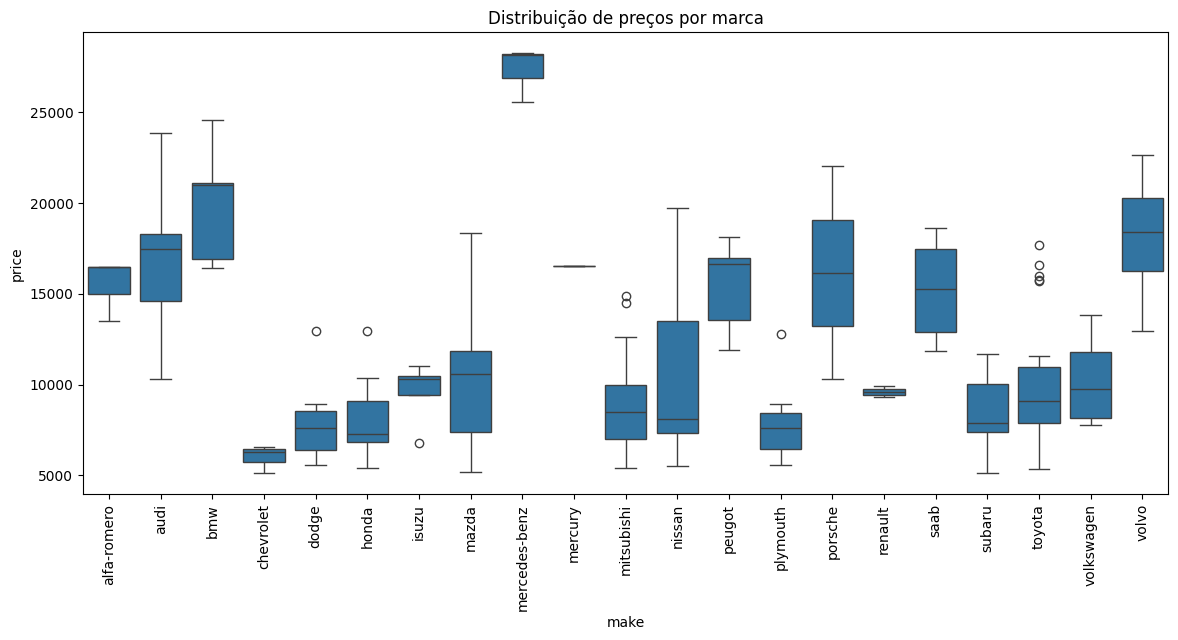

In [82]:
#BoxPlot: Visualização da Distribuição do Preço por Marca
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='make', y='price')
plt.xticks(rotation=90)
plt.title('Distribuição de preços por marca')


**3º Passo:** Aplicação de Teste Não-Parámetrico ( Kruskal Wallis)
Aplicamos o teste de Kruskal-Wallis para verificar se existem diferenças estatisticamente significativas nos preços (price) entre as diferentes marcas (make).

Premissas para aplicar o teste:
- Dados contínuos com +3 grupos independentes;
- Distribuição dos dados não é normal;
- Deseja testar diferença de medianas;

NOTA: O Kruskal-Wallis testa se pelo menos um grupo tem uma mediana diferente das demais.

In [ ]:
# Antes de aplicar o teste, Aplicar o teste de Normalidade na variável preço e verificar se é a distribuição é Normal ou Não.

signif = 0.05
stat_test, p_valor = normaltest(df['price'])
print(stat_test)
print(p_valor)

# True - ou seja rejeita a Hipotese Nula, nos diz que a coluna `price` não faz parte de uma distribuição normal
if p_valor <= signif:
    print("Hipótese Nula Rejeitada - Distribuição não é normal!!")
else:
    print("Distribuição é normal!!")

In [ ]:
# Definir o mínimo de amostras por marca
min_amostras = 5

# Filtrar o DataFrame para manter apenas marcas com pelo menos `min_amostras` amostras
df_filtrado = df.groupby('make').filter(lambda x: len(x) >= min_amostras)

# Mostrar quais marcas foram mantidas e suas quantidades
print("\nMarcas selecionadas para o teste de Kruskal-Wallis: (n>=5)\n")
marcas_selecionadas = df_filtrado['make'].value_counts().sort_values(ascending=False)
print(marcas_selecionadas)

# Agrupar os preços por marca para o teste
grouped_price_lists = [group['price'].values for name, group in df_filtrado.groupby('make')]

# Aplicar o teste de Kruskal-Wallis
stat, p_value = kruskal(*grouped_price_lists) # usar * para desempacotar os elementos do grupo de listas

print("\nResultado do Teste de Kruskal-Wallis:")
print(f"Estatística H: {stat:.2f}")
print(f"Valor-p: {p_value:.4f}")

# Interpretação automática
alpha = 0.05
if p_value < alpha:
    print(" Conclusão: Existe diferença estatisticamente significativa entre os preços das marcas.")
else:
    print(" Conclusão: Não há diferença estatisticamente significativa entre os preços das marcas.")


**💡Insights Obtidos**:
- O resultado indicou um valor-p de 0.0000, o que nos leva a rejeitar a hipótese nula. O valor H = 79.55 indica uma forte separação dos ranks entre as marcas.Portanto, podemos concluir que ***existem diferenças significativas nas distribuições de preços entre pelo menos duas marcas***. 
- Análise Exploratória mostrou que certas marcas como 'Mercedez-Benz', 'Audi', 'BMW' tendem a apresentar preços médios significativamente mais altos em comparação a marcas tradicionais como: 'chevrolet', 'toyota', 'honda'.

#### Análise por Tipo de Veículo body-style

**📌Insights esperados**:
- d) Tipos de carroceria (`body-style`) associados a segmentos premium ou esportivos (ex: convertible, hardtop) terão preços médios `price` mais altos do que tipos de carroceria mais utilitários (ex: sedan, hatchback).

In [ ]:
# Subset
df_group_by_body = df[['body-style','price']]

# Agrupar por 'make' com estatísticas
df_group_by_body = df_group_by_body.groupby(['body-style'], as_index=False)['price'].agg(
    count='count', sum='sum', mean='mean',min='min', max='max' ).round(2)


# Calcular % de participação
total_price = df_group_by_body['sum'].sum()
df_group_by_body['percent%'] = ((df_group_by_body['sum'] / total_price) * 100).round(2)


# Ordenar pela soma total
df_group_by_body = df_group_by_body.sort_values(['sum'], ascending=False).reset_index(drop=True)


# Calcular percent acumulado
df_group_by_body['cumsum_%'] = df_group_by_body['percent%'].cumsum().round(2)

# Ajustar índice para iniciar em 1 (opcional)
df_group_by_body.index = range(1, len(df_group_by_body) + 1)
df_group_by_body


De acordo com a tabela acima, 80% dos veículos correspondem as categorias 'sedan' e 'hatchback', uma preferência em veículos utilitários.

##### Agrupamento por Perfil Cliente do tipo de carro (nova)

In [ ]:
# Subset
df_group_by_profile = df[['car-profile','price']]

# Agrupar por 'make' com estatísticas
df_group_by_profile = df_group_by_profile.groupby(['car-profile'], as_index=False)['price'].agg(
    count='count', sum='sum', mean='mean',min='min', max='max' ).round(2)


# Calcular % de participação
total_price = df_group_by_profile['sum'].sum()
df_group_by_profile['percent%'] = ((df_group_by_profile['sum'] / total_price) * 100).round(2)


# Ordenar pela soma total
df_group_by_profile = df_group_by_profile.sort_values(['sum'], ascending=False).reset_index(drop=True)


# Calcular percent acumulado
df_group_by_profile['cumsum_%'] = df_group_by_profile['percent%'].cumsum().round(2)

# Ajustar índice para iniciar em 1 (opcional)
df_group_by_profile.index = range(1, len(df_group_by_profile) + 1)
df_group_by_profile


In [ ]:
# "O tipo de carroceria influencia significativamente o preço do carro?"

# Separando os preços por grupo
groups = [group['price'].values for name, group in df.groupby('body-style')]

# Aplicando o teste
stat, p = kruskal(*groups)

print(f"Kruskal-Wallis H = {stat:.2f}, p-value = {p:.4f}")


alpha = 0.05
if p_value < alpha:
    print("Existe diferença estatística entre as medianas de pelo menos um grupo.")
else:
    print("Rejeita H0 - Não há evidência suficiente para afirmar que as medianas são diferentes.")

**💡Insights Obtidos**:
- O resultado indicou um valor-p de 0.0080, o que nos leva a rejeitar a hipótese nula. O valor H = 13.79 indica uma moderada separação dos ranks entre as os tipos de carroceria.Portanto, podemos concluir que ***existem diferenças significativas nas distribuições de preços entre os tipos de carroceria*** e uma preferência maior para carrocerias do segmento utilitários, onde representa 90% do total de veículos.

**📌Insights esperados**:

- e) O risco atribuído pelo seguro (`symboling`) terá alguma correlação com o `price`.

In [ ]:
# "O tipo de carroceria influencia significativamente o preço do carro?"

# Separando os preços por grupo
groups = [group['price'].values for name, group in df.groupby('symboling')]

# Aplicando o teste
stat, p = kruskal(*groups)

print(f"Kruskal-Wallis H = {stat:.2f}, p-value = {p:.4f}")


alpha = 0.05
if p_value < alpha:
    print("Existe diferença estatística entre as medianas de pelo menos um grupo.")
else:
    print("Rejeita H0 - Não há evidência suficiente para afirmar que as medianas são diferentes.")

**💡Insight Obtido**:
- O resultado indicou um valor-p de 0.0000, o que nos leva a rejeitar a hipótese nula. O valor H = 53.03 indica uma forte separação dos ranks nas classificações do risco de seguro. Portanto, podemos concluir que ***existem diferenças significativas nas distribuições de preços entre os tipos de  risco de seguro*** e uma preferência maior para carrocerias do segmento utilitários, onde representa 90% do total de veículos.

In [ ]:
# 6. Cramér's V para ver correlação entre variáveis categóricas
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Exemplo de Cramér's V entre duas variáveis categóricas
print(cramers_v(df['body-style'], df['engine-size']))